<a href="https://colab.research.google.com/github/rahuldesai02/2048/blob/master/BayesClassifier_A_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bayes classifier
Covariance matrix for all the classes is the same and is σ2I

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
train_1 = np.loadtxt('class1_train.txt')
train_2 = np.loadtxt('class2_train.txt')
train_3 = np.loadtxt('class3_train.txt')
train_4 = np.loadtxt('class4_train.txt')
val_1 = np.loadtxt('class1_val.txt')
val_2 = np.loadtxt('class2_val.txt')
val_3 = np.loadtxt('class3_val.txt')
val_4 = np.loadtxt('class4_val.txt')
test_1 = np.loadtxt('class1_test.txt')
test_2 = np.loadtxt('class2_test.txt')
test_3 = np.loadtxt('class3_test.txt')
test_4 = np.loadtxt('class4_test.txt')
train1 = pd.DataFrame(train_1, columns = ['x1', 'x2']) 
train2 = pd.DataFrame(train_2, columns = ['x1', 'x2'])
train3 = pd.DataFrame(train_3, columns = ['x1', 'x2'])
train4 = pd.DataFrame(train_4, columns = ['x1', 'x2'])
test1 = pd.DataFrame(test_1, columns = ['x1', 'x2'])
test2 = pd.DataFrame(test_2, columns = ['x1', 'x2'])
test3 = pd.DataFrame(test_3, columns = ['x1', 'x2'])
test4 = pd.DataFrame(test_4, columns = ['x1', 'x2'])

In [0]:
train1.head(5)

,x1,x2
0,-0.029920,5.0641
1,-1.026700,2.6153
2,2.388900,2.3820
3,-0.033724,1.5192
4,1.400900,2.9711


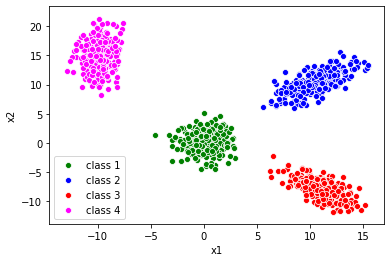

In [0]:
sns.scatterplot(x="x1", y="x2", data=train1,color = 'green',label="class 1")
sns.scatterplot(x="x1", y="x2", data=train2,color = 'blue',label="class 2")
sns.scatterplot(x="x1", y="x2", data=train3,color = 'red',label="class 3")
sns.scatterplot(x="x1", y="x2", data=train4,color = 'magenta',label="class 4")

In [0]:
u1 = train1.mean()
u2 = train2.mean()
u3 = train3.mean()
u4 = train4.mean()
c1 = train1.cov()
c2 = train2.cov()
c3 = train3.cov()
c4 = train4.cov()

In [0]:
c = (c1+c2+c3+c4)/4
C = (c.mean()).mean()
C

1.7062136551737916

In [0]:
N = len(train1) + len(train2) + len(train3) + len(train4)
pc1 = len(train1)/N
pc2 = len(train2)/N
pc3 = len(train3)/N
pc4 = len(train4)/N

In [0]:
test1.loc[0,:]

x1   -1.1472
x2    1.4582
Name: 0, dtype: float64

In [0]:
def g(x,u,pc,c):
  w = u/c
  w0 = -u.dot(u)/(2*c) + math.log(pc)
  return w.dot(x) + w0

In [0]:
def classify(x):
  y1 = g(x,u1,pc1,C)
  y2 = g(x,u2,pc2,C)
  y3 = g(x,u3,pc3,C)
  y4 = g(x,u4,pc4,C)
  return np.argmax([y1,y2,y3,y4])

In [0]:
g(test1.loc[6,:],u3,pc3,C)

-81.17052228106073

In [0]:
classify(test4.loc[6,:])

3

In [0]:
actual = []
predicted = []
for x in test1.iterrows():
  actual.append(0)
  predicted.append(classify(x[1]))
for x in test2.iterrows():
  actual.append(1)
  predicted.append(classify(x[1]))
for x in test3.iterrows():
  actual.append(2)
  predicted.append(classify(x[1]))
for x in test4.iterrows():
  actual.append(3)
  predicted.append(classify(x[1]))

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Classification Accuracy:',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Classification Accuracy: 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [0]:
resultsdf = pd.DataFrame(results,columns = ['True 1', 'True 2', 'True 3','True 4'],index=['Predicted 1', 'Predicted 2', 'Predicted 3','Predicted 4'])
resultsdf

,True 1,True 2,True 3,True 4
Predicted 1,100,0,0,0
Predicted 2,0,100,0,0
Predicted 3,0,0,100,0
Predicted 4,0,0,0,100


In [0]:
target_names = ['class 1', 'class 2', 'class 3','class 4']
print(classification_report(actual, predicted,target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       100
     class 2       1.00      1.00      1.00       100
     class 3       1.00      1.00      1.00       100
     class 4       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [0]:
def decision_boundary(x, u1, u2,pc1,pc2,C):
    g1 = g(x,u1,pc1,C)
    g2 = g(x,u2,pc2,C)
    return g1 - g2

In [0]:
def decisionPlotpair(train1,train2,u1,u2,pc1,pc2,C,colors,cl1,cl2):
  xx1 = []
  xx2 = []
  x1_min = min(train1['x1'].min(),train2['x1'].min())
  x2_min = min(train1['x2'].min(),train2['x2'].min())
  x1_max = max(train1['x1'].max(),train2['x1'].max())
  x2_max = max(train1['x2'].max(),train2['x2'].max())
  for x1 in np.arange(x1_min, x1_max, 0.1):
    for x2 in np.arange(x2_min, x2_max, 0.1):
      y1 = g([x1,x2],u1,pc1,C)
      y2 = g([x1,x2],u2,pc2,C)
      y = np.argmax([y1,y2])
      if(y==0):
        xx1.append([x1,x2])
      else:
        xx2.append([x1,x2])    
  df1 = pd.DataFrame(data = xx1,columns = ['x1', 'x2'])
  df2 = pd.DataFrame(data = xx2, columns = ['x1', 'x2'])   
  f, ax = plt.subplots(figsize=(7, 7))
  ax = plt.scatter(x=df1['x1'],y=df1['x2'],color = colors[0])
  ax = plt.scatter(x=df2['x1'],y=df2['x2'],color = colors[1])
  ax = sns.scatterplot(x="x1", y="x2", data=train1,color = colors[2],label="class"+str(cl1))
  ax = sns.scatterplot(x="x1", y="x2", data=train2,color = colors[3],label="class"+str(cl2)) 

In [0]:
dot1 = 'blue'
dot2 = 'red'
dot3 = 'magenta'
dot4 = 'darkgreen'
bg1 = 'lightgreen'
bg2 = 'lightblue'
bg3 = 'yellow'
bg4 = 'pink'

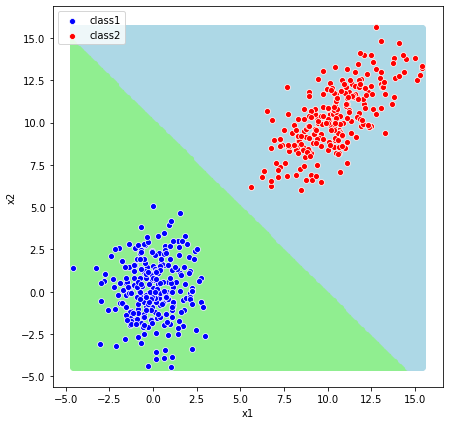

In [23]:
colors1 = ['lightgreen','lightblue','blue','red']
decisionPlotpair(train1,train2,u1,u2,pc1,pc2,C,colors1,1,2)

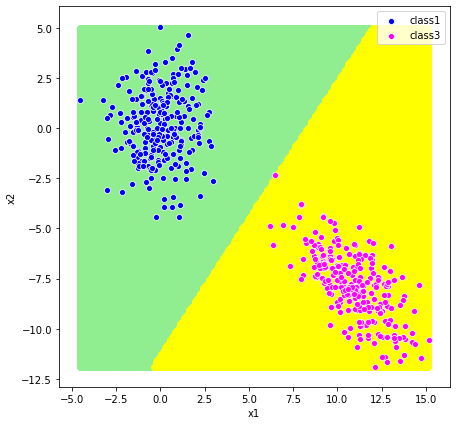

In [24]:
colors2 = ['lightgreen','yellow','blue','magenta']
decisionPlotpair(train1,train3,u1,u3,pc1,pc3,C,colors2,1,3)

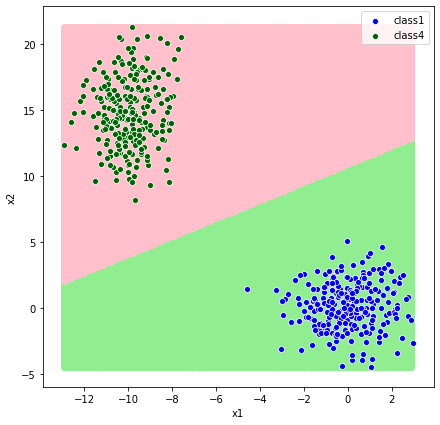

In [25]:
colors3 = ['lightgreen','pink','blue','darkgreen']
decisionPlotpair(train1,train4,u1,u4,pc1,pc4,C,colors3,1,4)

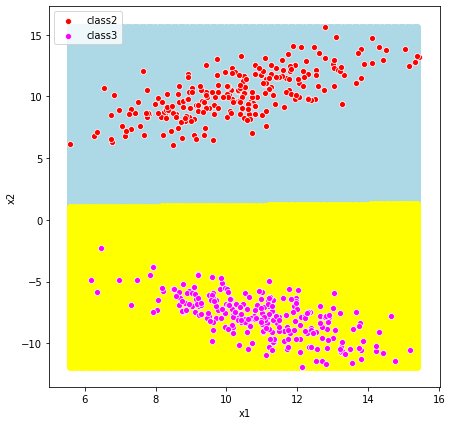

In [29]:
colors5 = [bg2,bg3,dot2,dot3]
decisionPlotpair(train2,train3,u2,u3,pc2,pc3,C,colors5,2,3)

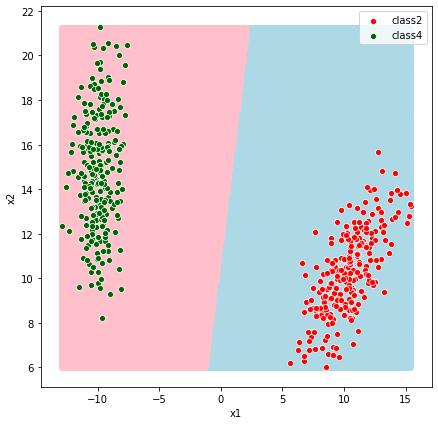

In [31]:
colors6 = [bg2,bg4,dot2,dot4]
decisionPlotpair(train2,train4,u2,u4,pc2,pc4,C,colors6,2,4)

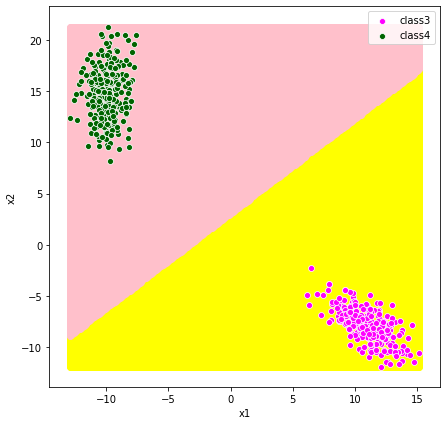

In [33]:
colors7 = [bg3,bg4,dot3,dot4]
decisionPlotpair(train3,train4,u3,u4,pc3,pc4,C,colors7,3,4)

In [0]:
def decisionPlot(train1,train2,train3,u1,u2,u3,pc1,pc2,pc3,C,colors):
  xx1 = []
  xx2 = []
  xx3 = []
  xx4 = []
  x1_min = min(train1['x1'].min(),train2['x1'].min(),train3['x1'].min(),train4['x1'].min())
  x2_min = min(train1['x2'].min(),train2['x2'].min(),train3['x2'].min(),train4['x2'].min())
  x1_max = max(train1['x1'].max(),train2['x1'].max(),train3['x1'].max(),train4['x1'].max())
  x2_max = max(train1['x2'].max(),train2['x2'].max(),train3['x2'].max(),train4['x2'].max())
  for x1 in np.arange(x1_min, x1_max, 0.1):
    for x2 in np.arange(x2_min, x2_max, 0.1):
      y1 = g([x1,x2],u1,pc1,C)
      y2 = g([x1,x2],u2,pc2,C)
      y3 = g([x1,x2],u3,pc3,C)
      y4 = g([x1,x2],u4,pc4,C) 
      y = np.argmax([y1,y2,y3,y4])
      if(y==0):
        xx1.append([x1,x2])
      elif(y==1):
        xx2.append([x1,x2])
      elif(y==2):
        xx3.append([x1,x2])
      elif(y==3):
        xx4.append([x1,x2])    
  df1 = pd.DataFrame(data = xx1,columns = ['x1', 'x2'])
  df2 = pd.DataFrame(data = xx2, columns = ['x1', 'x2'])   
  df3 = pd.DataFrame(data = xx3, columns = ['x1', 'x2'])
  df4 = pd.DataFrame(data = xx4, columns = ['x1', 'x2']) 
  f, ax = plt.subplots(figsize=(7, 7))
  ax = plt.scatter(x=df1['x1'],y=df1['x2'],color = colors[0])
  ax = plt.scatter(x=df2['x1'],y=df2['x2'],color = colors[1])
  ax = plt.scatter(x=df3['x1'],y=df3['x2'],color = colors[2])
  ax = plt.scatter(x=df4['x1'],y=df4['x2'],color = colors[3])
  ax = sns.scatterplot(x="x1", y="x2", data=train1,color = colors[4],label="class 1")
  ax = sns.scatterplot(x="x1", y="x2", data=train2,color = colors[5],label="class 2")
  ax = sns.scatterplot(x="x1", y="x2", data=train3,color = colors[6],label="class 3") 
  ax = sns.scatterplot(x="x1", y="x2", data=train4,color = colors[7],label="class 4") 

In [0]:
colors = [bg1,bg2,bg3,bg4,dot1,dot2,dot3,dot4]
decisionPlot(train1,train2,train3,u1,u2,u3,pc1,pc2,pc3,C,colors)